Dagilim Grafikleri

Barplot

In [5]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    se

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [1]:
df.describe()

NameError: name 'df' is not defined

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [15]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [19]:
#ordinal tanimlama
from pandas.api.types import CategoricalDtype

In [21]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [33]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [35]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [37]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [39]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]

In [41]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True)) #kategori isimlerini degistirir sirali yapar(ordered)

In [43]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [45]:
#barplot

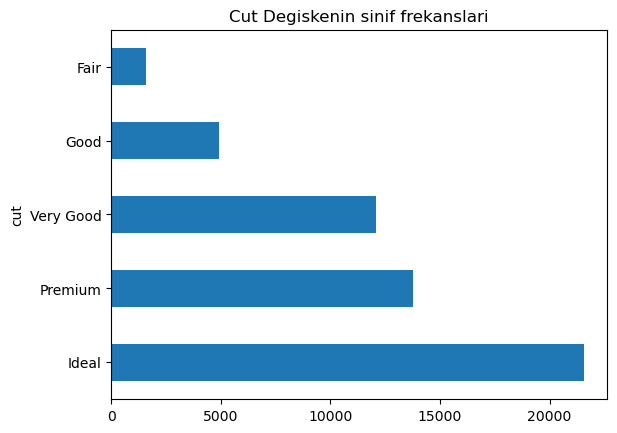

In [49]:
df["cut"].value_counts().plot.barh().set_title("Cut Degiskenin sinif frekanslari");

In [ ]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Degiskenin sinif frekanslari")); #boyle daha hos gozukuyo

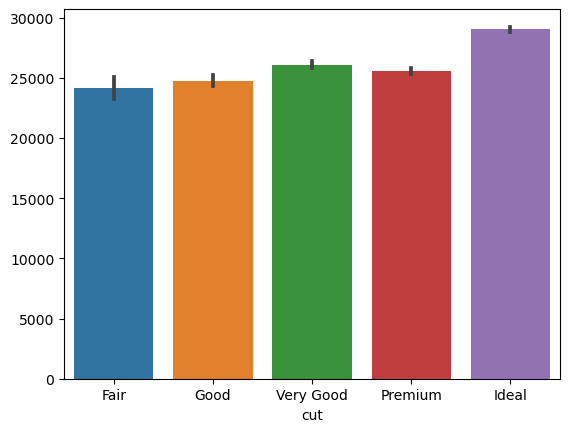

In [53]:
sns.barplot(x="cut",y= df.cut.index,data=df);

In [ ]:
#caprazlama

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


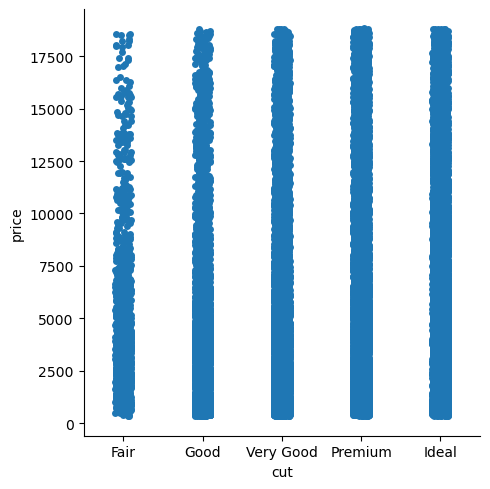

In [55]:
sns.catplot(x="cut",y="price",data=df);

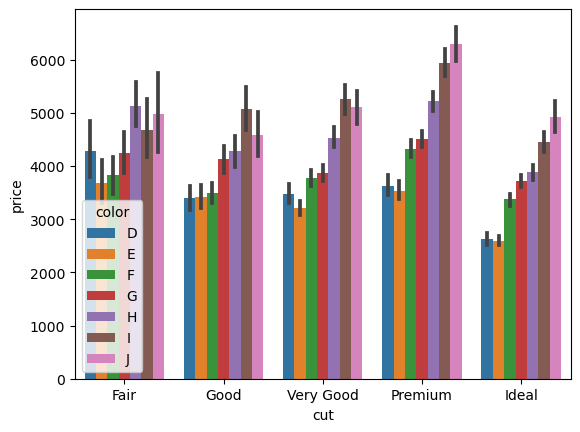

In [57]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [59]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


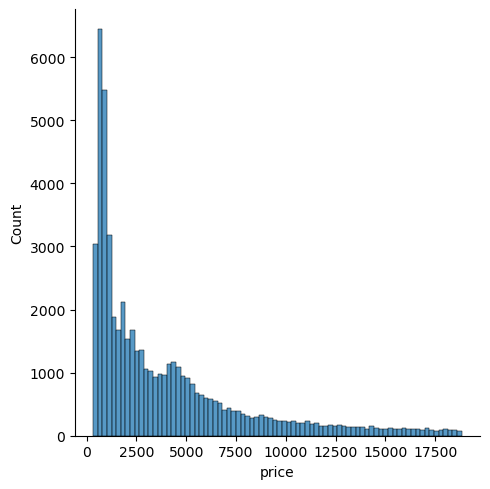

In [61]:
sns.displot(df.price,kde=False); #histogram ((kde=True): Hem histogram barlarını hem de üzerine oturtulmuş KDE (Kernel Density Estimation) eğrisini gösterir.)

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


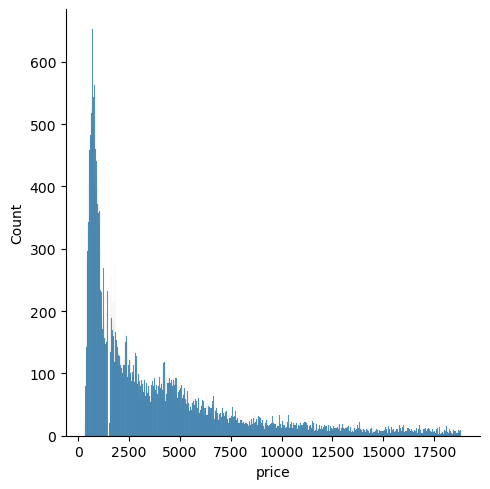

In [63]:
sns.displot(df.price,bins=1000,kde=False);#1000 kutucuklu bi grafik

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


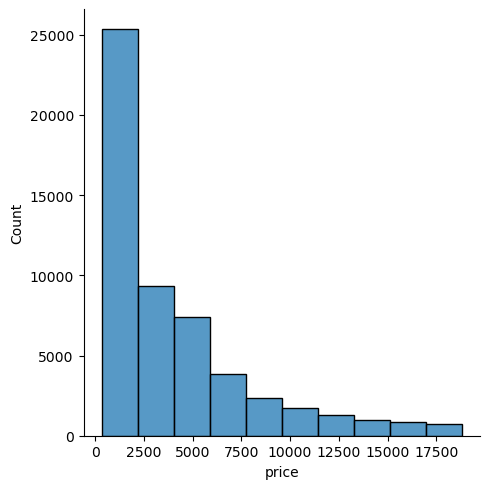

In [65]:
sns.displot(df.price,bins=10,kde=False); #10 kutucuklu bi deger olusturmaya calisilir

/var/folders/cb/kqy596zn76x0ylk91zzyhq8r0000gn/T/ipykernel_1427/184483151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


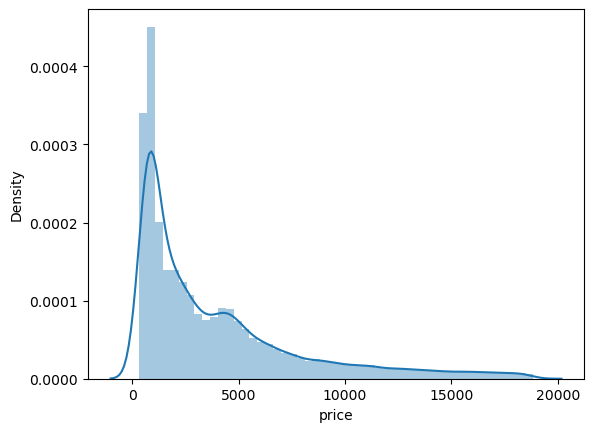

In [69]:
sns.distplot(df.price);
#yogunluk grafigi histogramla birlikte

/var/folders/cb/kqy596zn76x0ylk91zzyhq8r0000gn/T/ipykernel_1427/1859046445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price,hist=False);


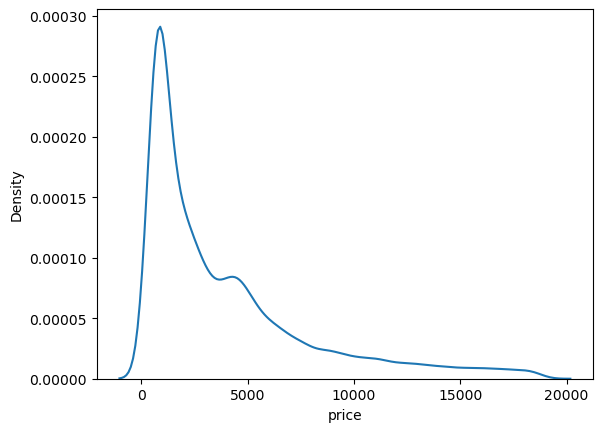

In [71]:
sns.distplot(df.price,hist=False); #sadece yogunluk grafigi

/var/folders/cb/kqy596zn76x0ylk91zzyhq8r0000gn/T/ipykernel_1427/4204285749.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price,shade=True);


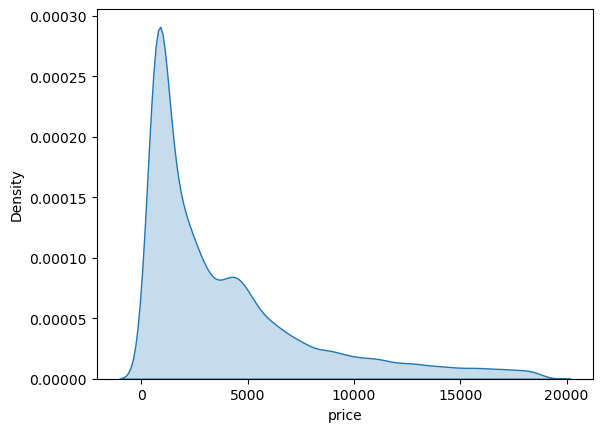

In [75]:
#grafigin altini doldurma
sns.kdeplot(df.price,shade=True);

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting

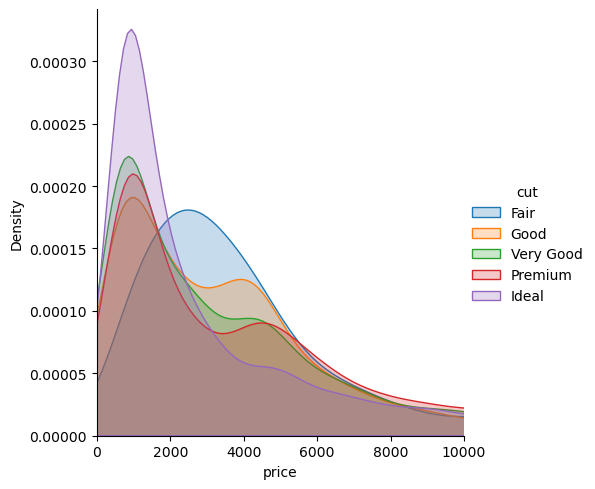

In [81]:
(sns.FacetGrid(df,
               hue="cut",
               height=5,
               xlim=(0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


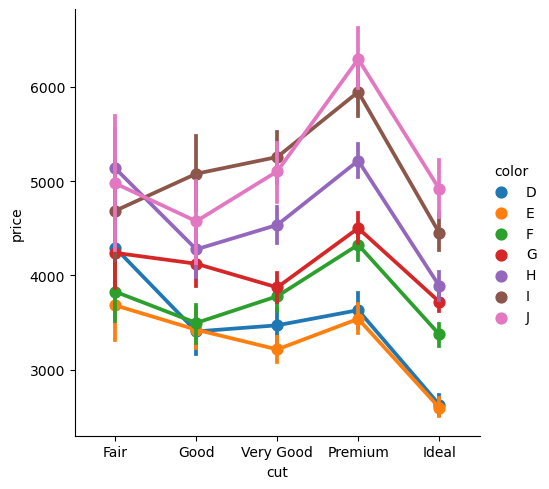

In [83]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);